In [ ]:
import pickle as pickle
import pickle5 as pickle5


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [5]:
import sys
import os
sys.path.insert(0, './../scripts_with_GI')

In [6]:
from importlib import reload

import functions_optimal as funopt
import functions as fun
import data_analysis as da
import sims_utils as su
import validate_utils as vu
import sims_analysis_utils as sau

import seaborn as sns
sns.set_style("whitegrid")
from scipy import  optimize

import plot_functions as pl
import ricciardi_class as ric
import network as network
reload(vu)
reload(pl)
# ri = ric.Ricciardi()
# ri.set_up_nonlinearity()
# res_param_idxs_fixed,res_param_idxs,res_moment_idxs,res_param_conv_idxs,sim_param_idxs,sim_param_conv_idxs = \
#     su.res_param_idxs_fixed,su.res_param_idxs,su.res_moment_idxs,
#     su.res_param_conv_idxs,su.sim_param_idxs,su.sim_param_conv_idxs

path2validate='./../validate_with_GI/'
path2savedfits='./../saved_fits/'

In [7]:
data=da.Data_MonkeyMouse('both','../data')


# Load ALl 

In [8]:

nameout_sim=path2savedfits+'/Normalization_Structured'
with open(nameout_sim+".pkl", 'rb') as handle_Structured:
    output_norm_str=pickle5.load(handle_Structured)
        
nameout_data=path2savedfits+'/Normalization_data'
with open(nameout_data+".pkl", 'rb') as handle_data:
    output_norm_data=pickle5.load(handle_data)
        
nameout_sim_uns=path2savedfits+'/Normalization_Unstructured'
with open(nameout_sim_uns+".pkl", 'rb') as handle_Unstructured:
    output_norm_unstr=pickle5.load(handle_Unstructured)
                

# Plot all normalization curves

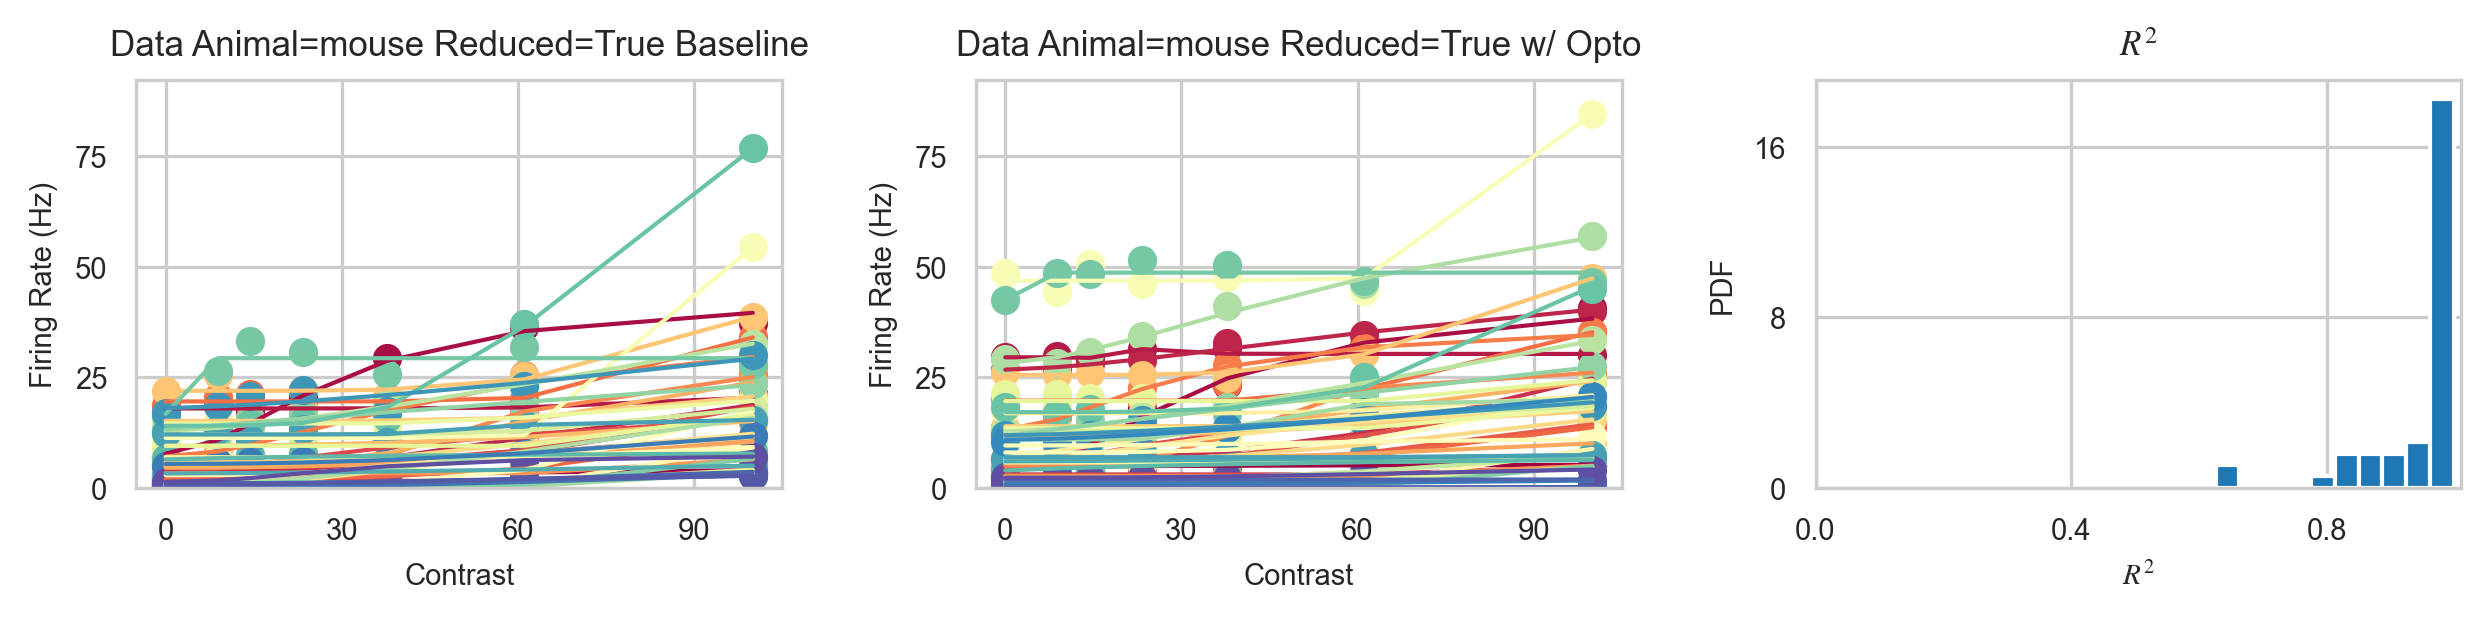

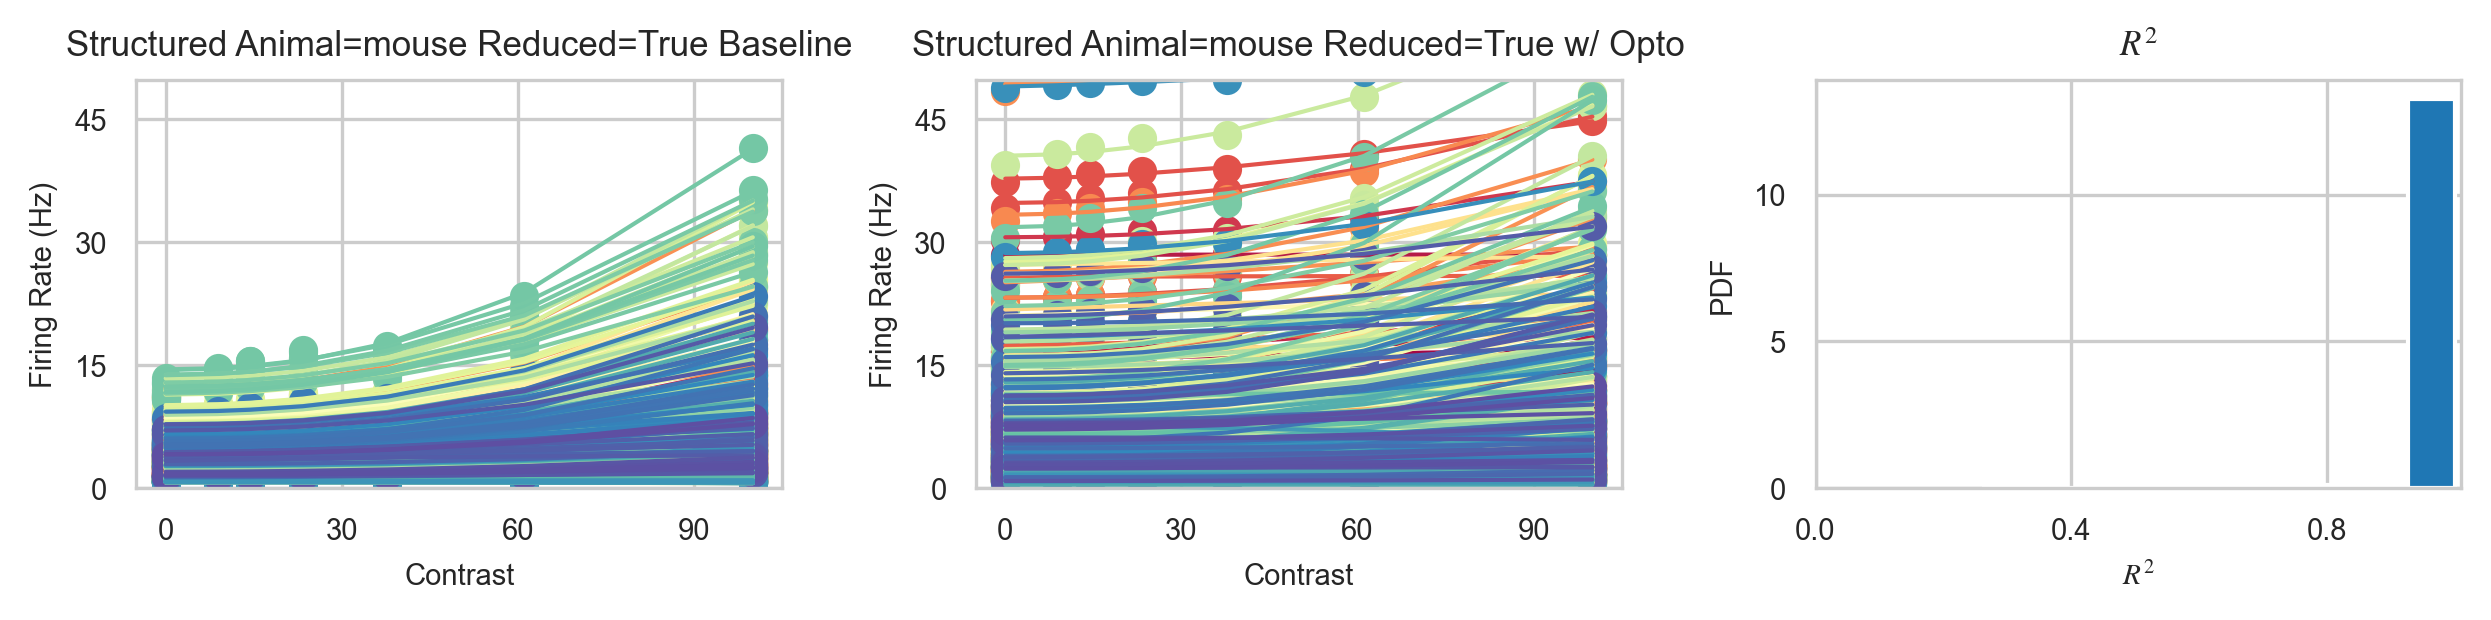

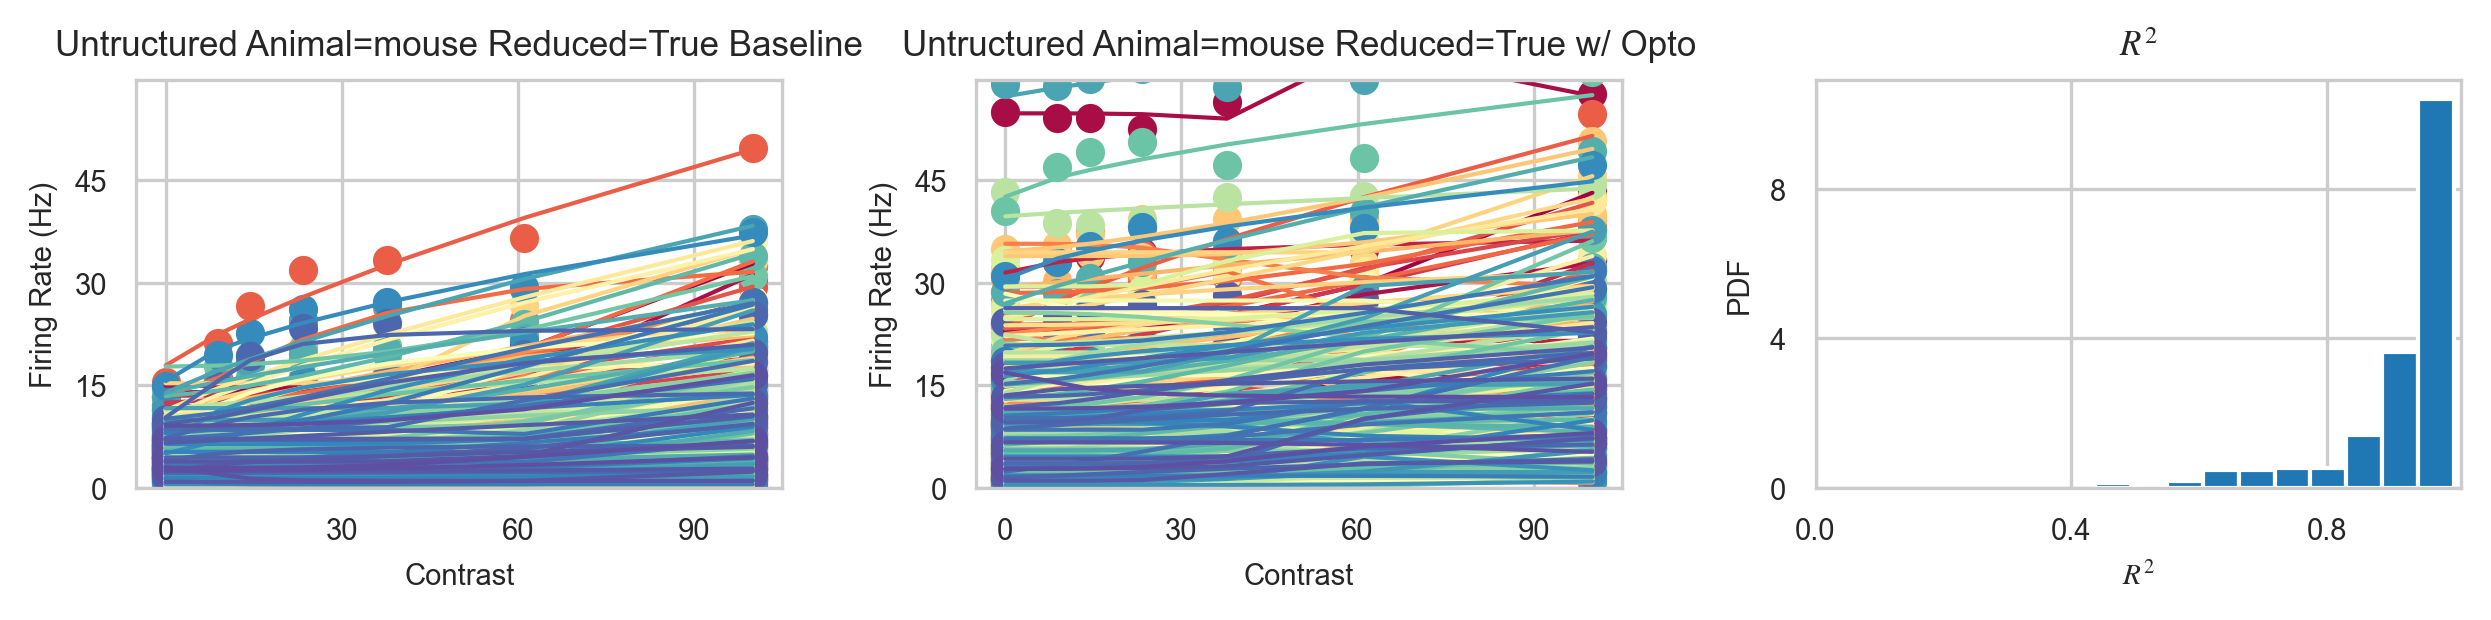

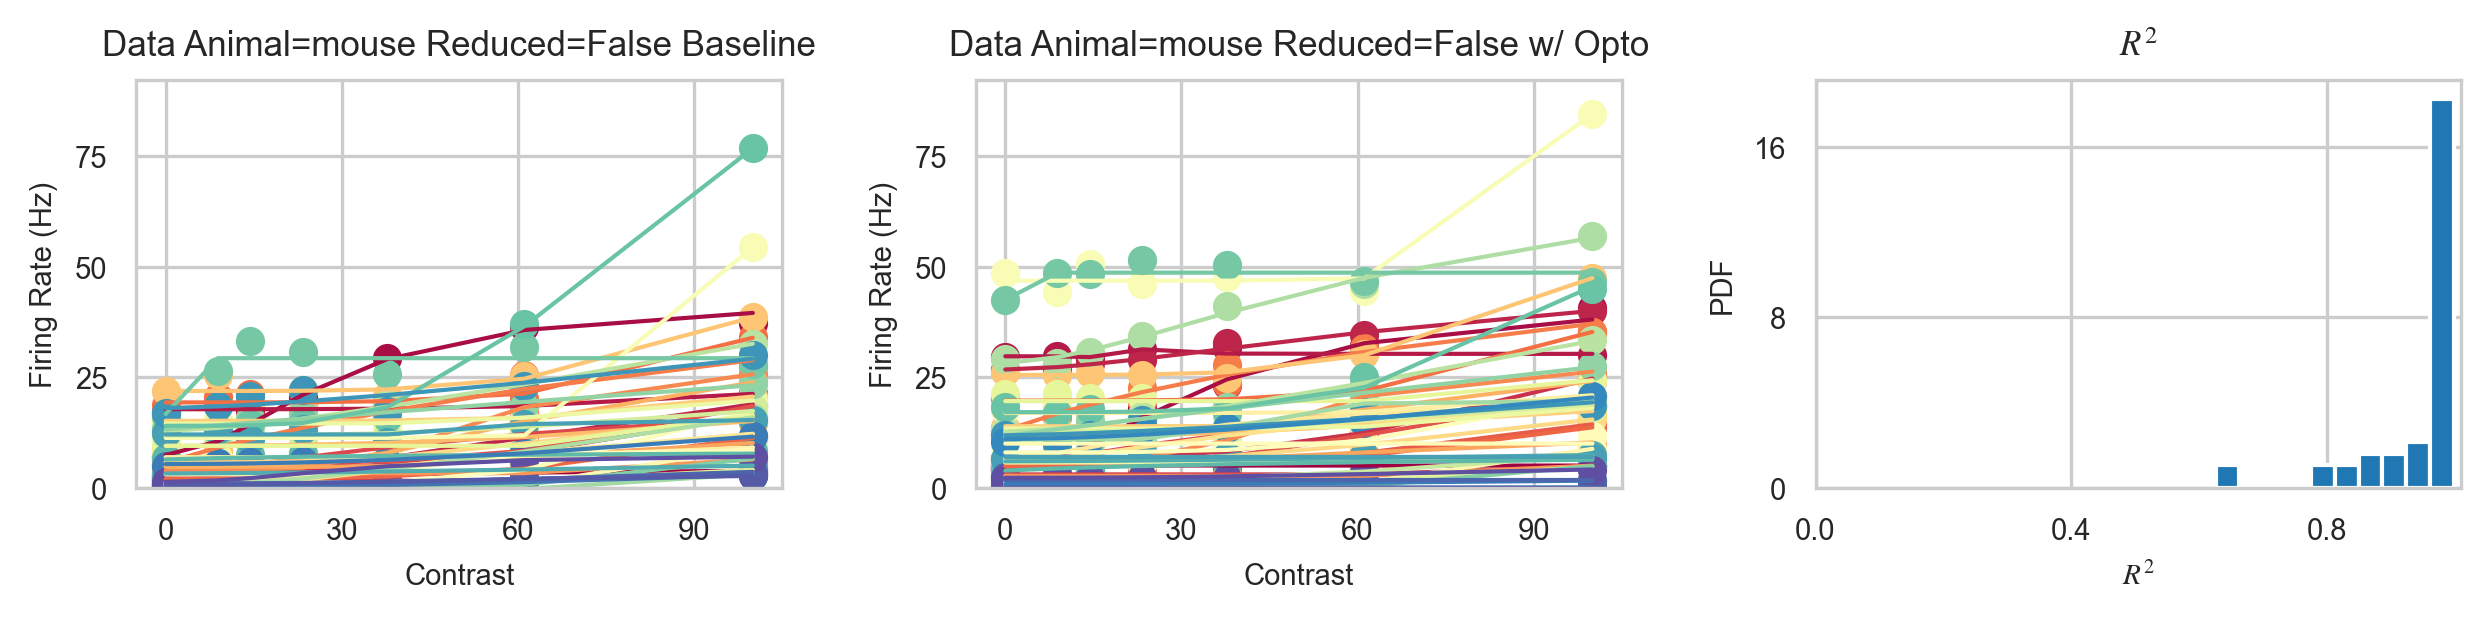

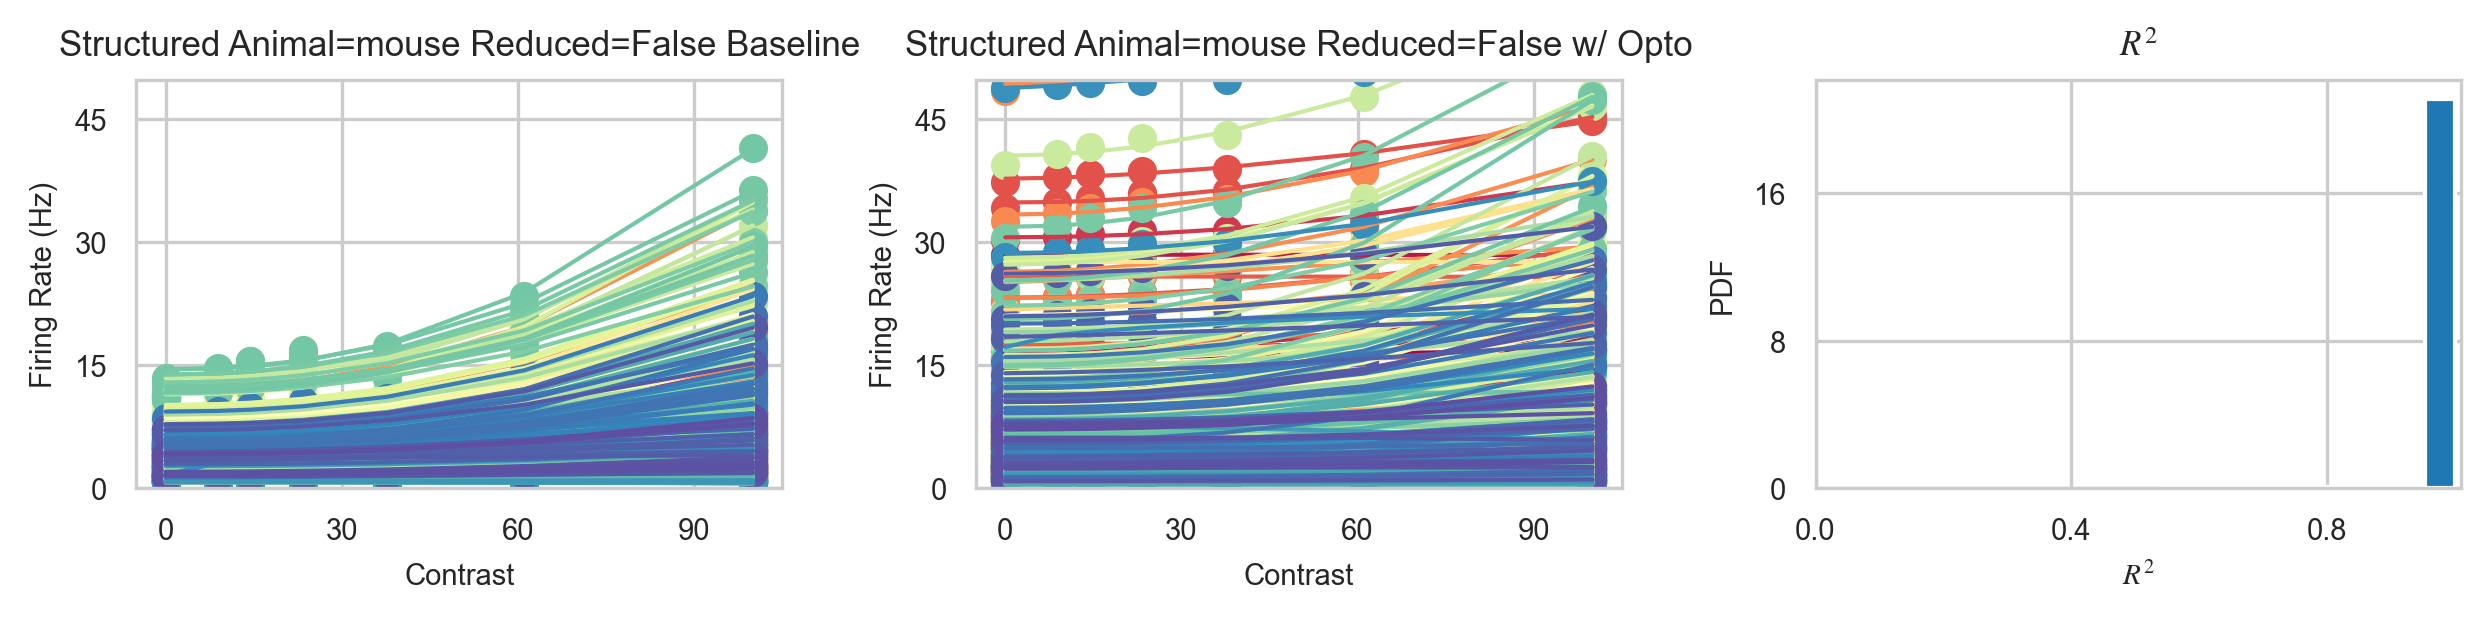

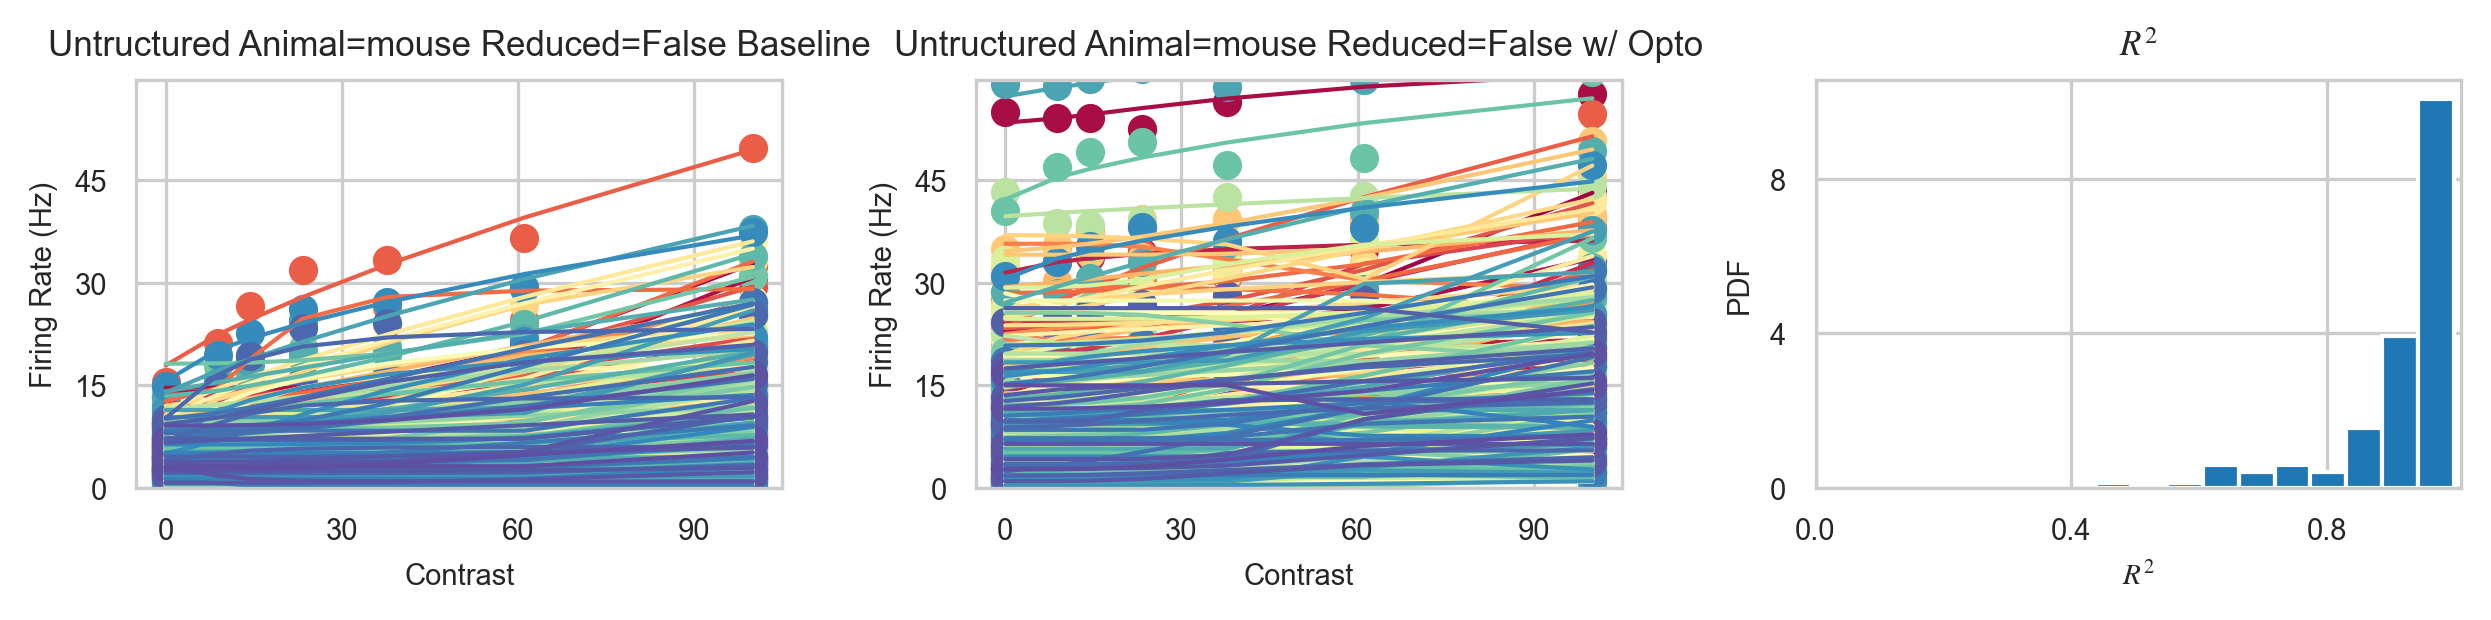

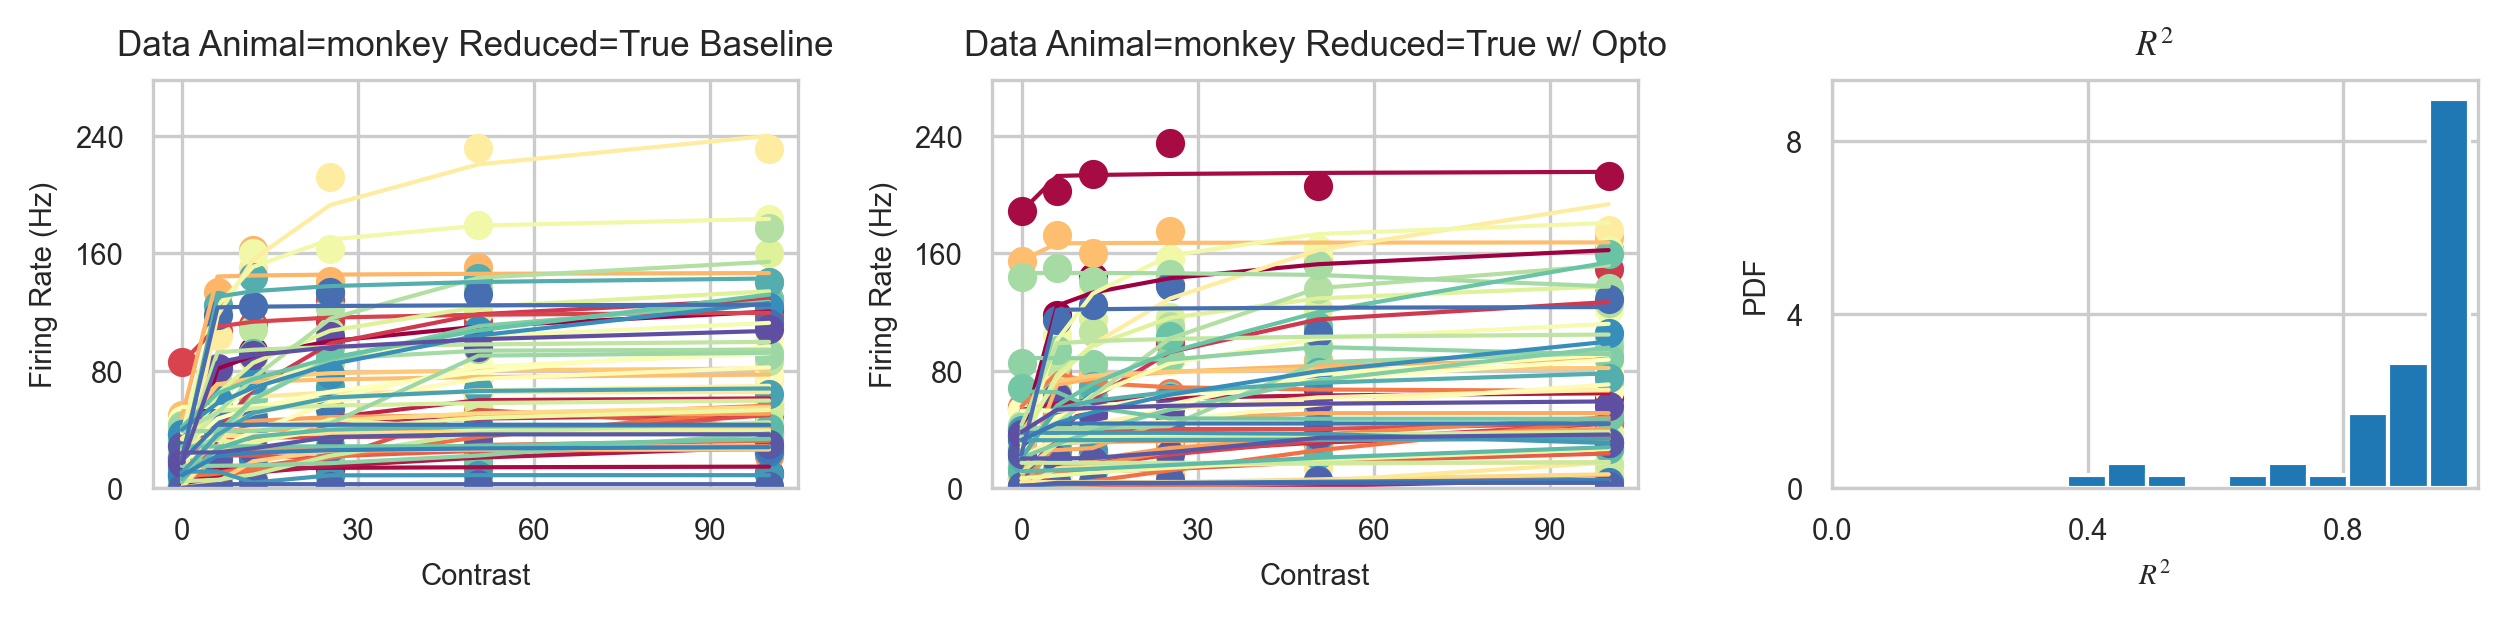

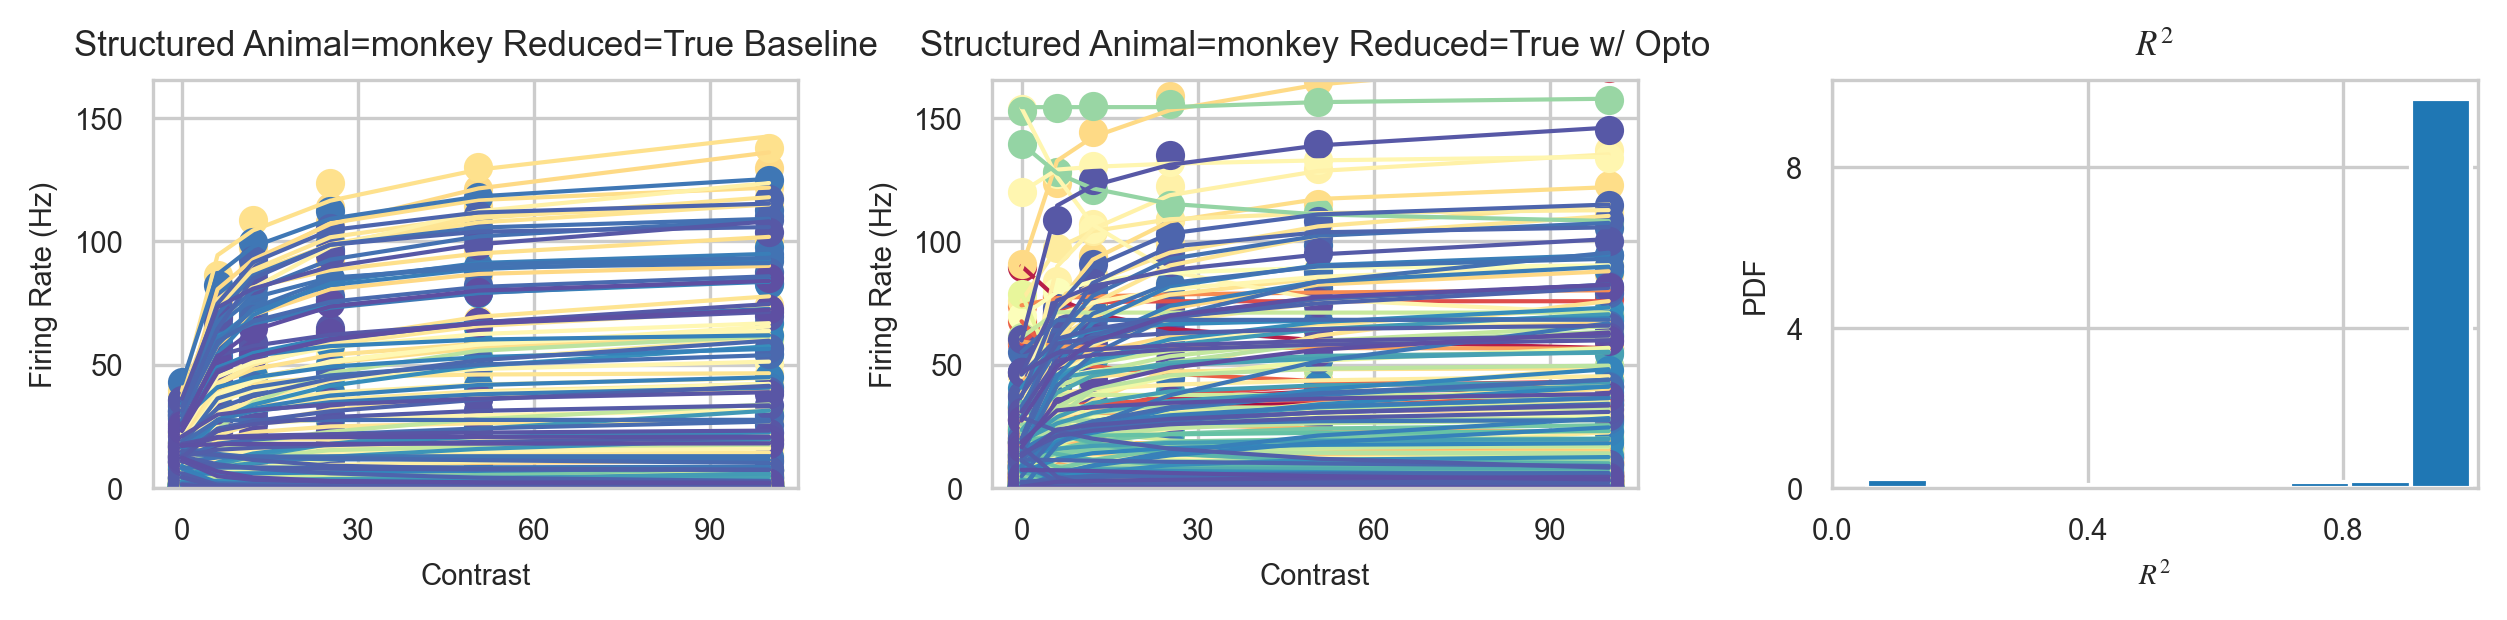

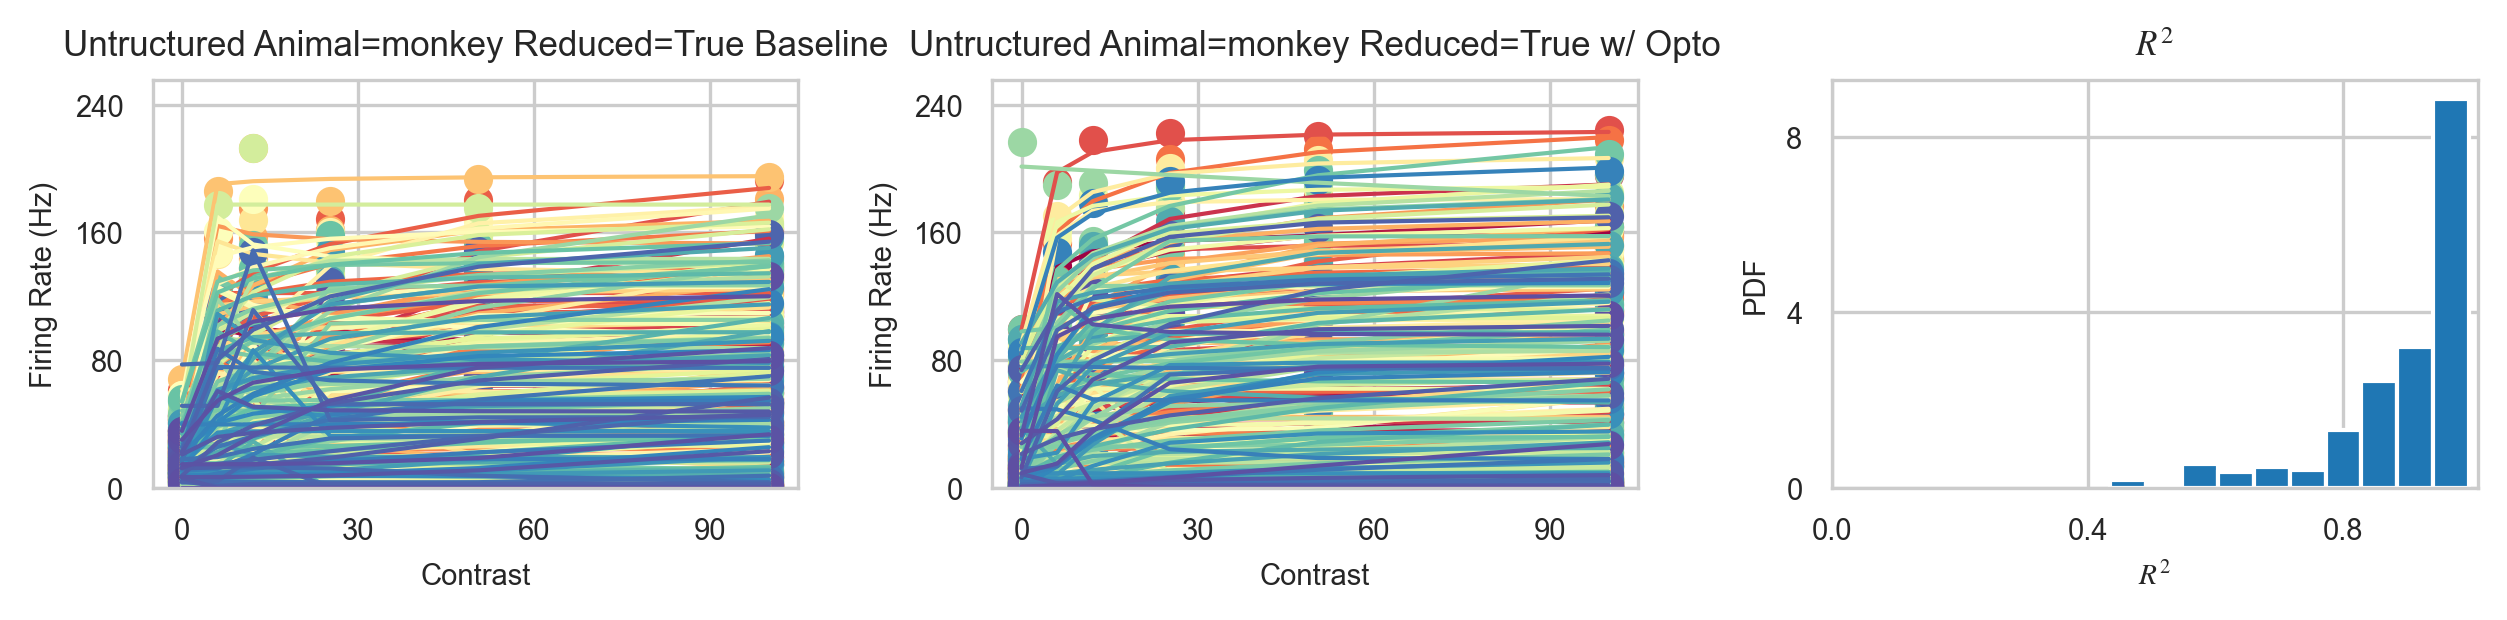

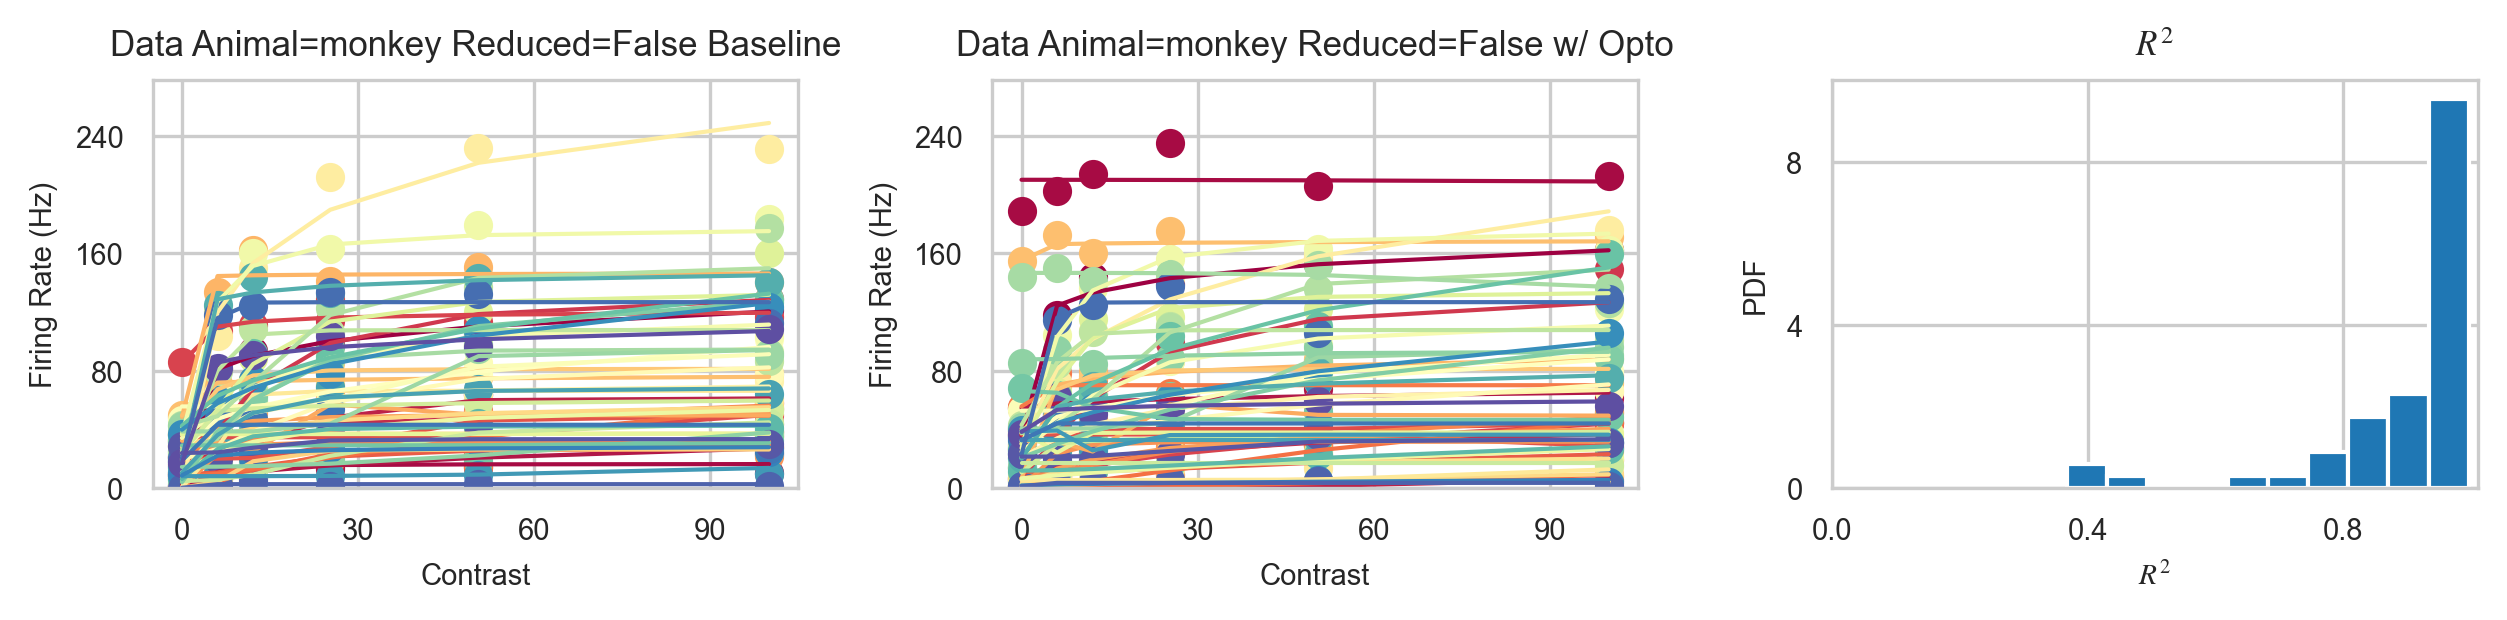

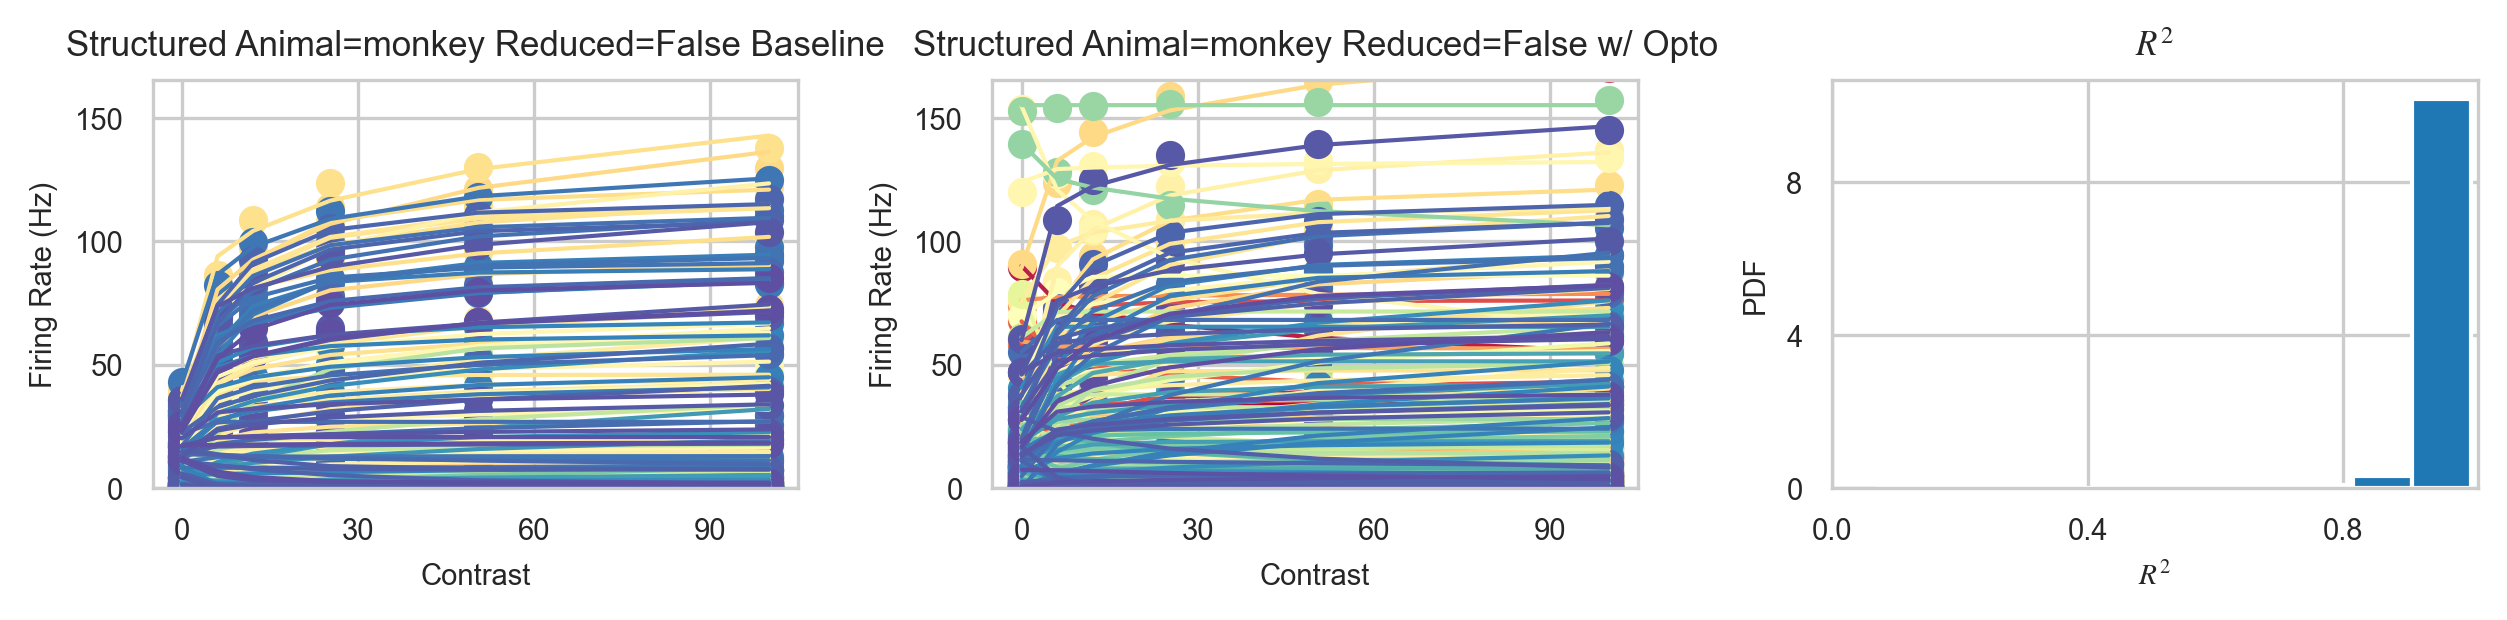

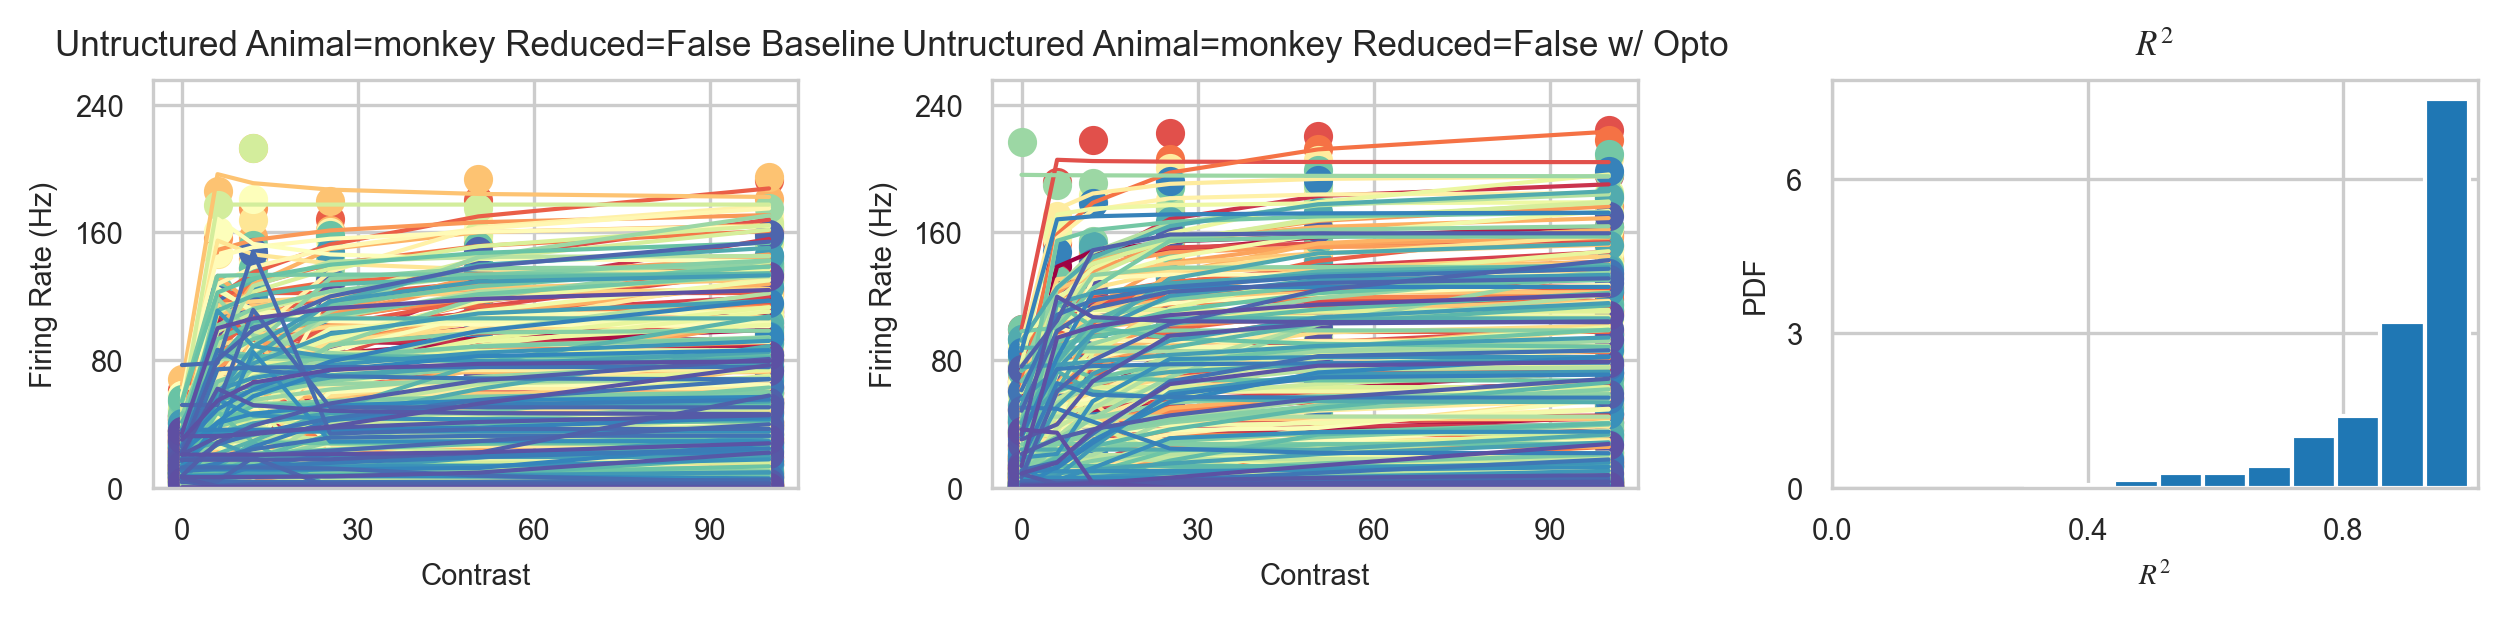

In [9]:




for animal, animal_idx in zip(data.this_animals,range(2)):

    for redux in [True, False]:
        
        
        
        #########################
        # Data
        name_out='Animal='+animal+'_Reduced='+str(redux)
        name_file_out='Normalization_Data_Plots_Animal='+animal+'_Reduced='+str(redux)

        title='Data Animal='+animal+' Reduced='+str(redux) 
        pl.plot_normalization_curves(output_norm_data['contrast_'+name_out],\
                                     output_norm_data['Rates_Matrix_flatten_'+name_out],\
                                     output_norm_data['all_fits_'+name_out], \
                                     output_norm_data['Rsq_'+name_out], \
                                     title, name_file_out)
        
        
        #########################
        # Structured
        name_out='Animal='+animal+'_Reduced='+str(redux)
        name_file_out='Normalization_Structured_Plots_Animal='+animal+'_Reduced='+str(redux)

        title='Structured Animal='+animal+' Reduced='+str(redux) 
        pl.plot_normalization_curves(output_norm_str['contrast_'+name_out],\
                                     output_norm_str['Rates_Matrix_flatten_'+name_out],\
                                     output_norm_str['all_fits_'+name_out], \
                                     output_norm_str['Rsq_'+name_out], \
                                     title, name_file_out)
    
        #########################
        # Unstructured
        name_out='Animal='+animal+'_Reduced='+str(redux)
        name_file_out='Normalization_Unstructured_Plots_Animal='+animal+'_Reduced='+str(redux)

        title='Untructured Animal='+animal+' Reduced='+str(redux) 
        pl.plot_normalization_curves(output_norm_unstr['contrast_'+name_out],\
                                     output_norm_unstr['Rates_Matrix_flatten_'+name_out],\
                                     output_norm_unstr['all_fits_'+name_out], \
                                     output_norm_unstr['Rsq_'+name_out], \
                                     title, name_file_out)
        

    

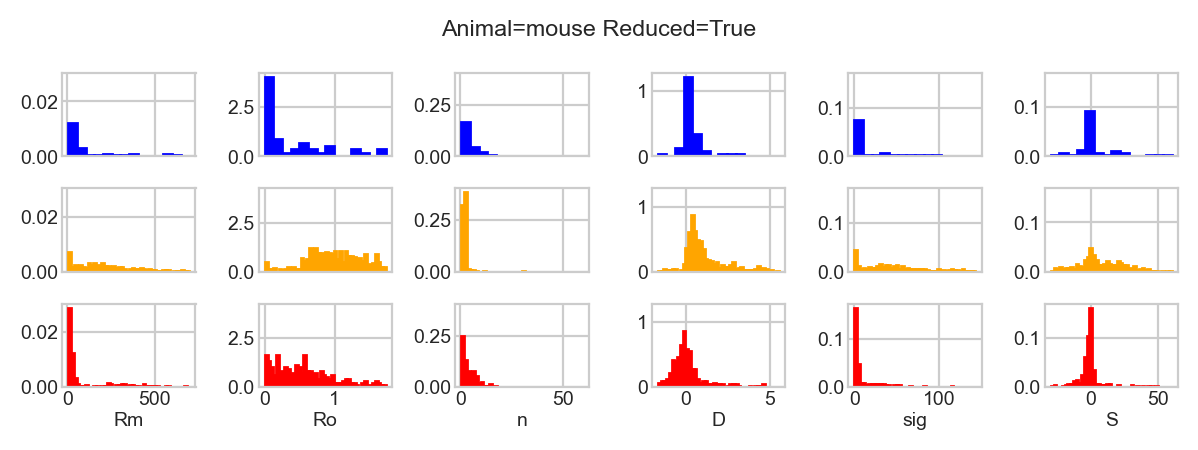

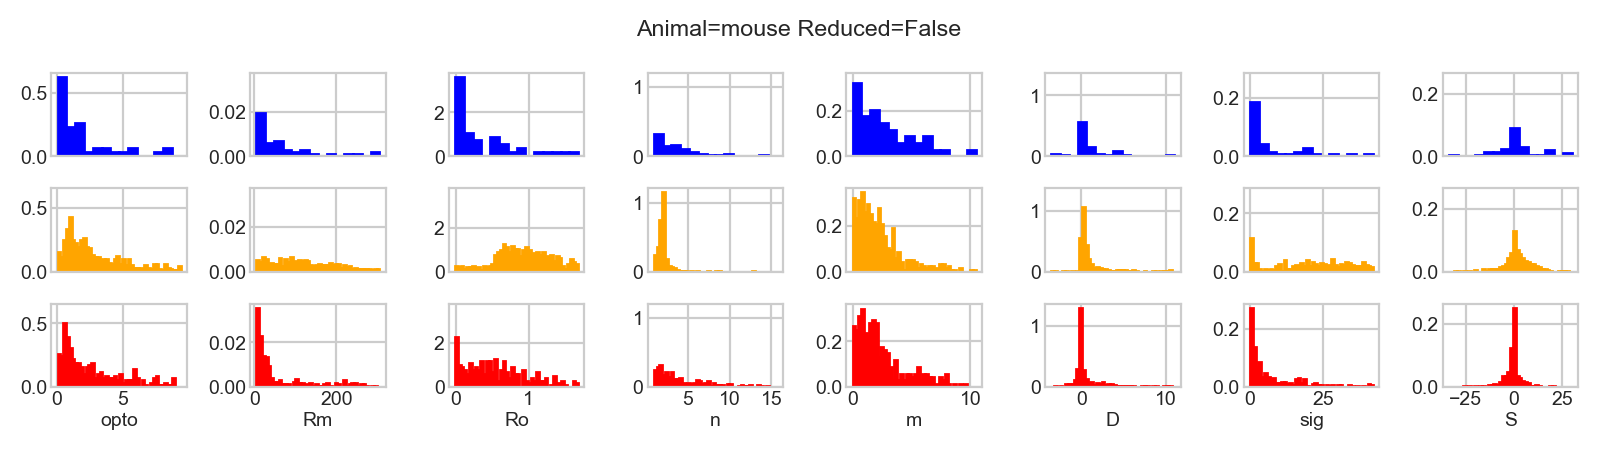

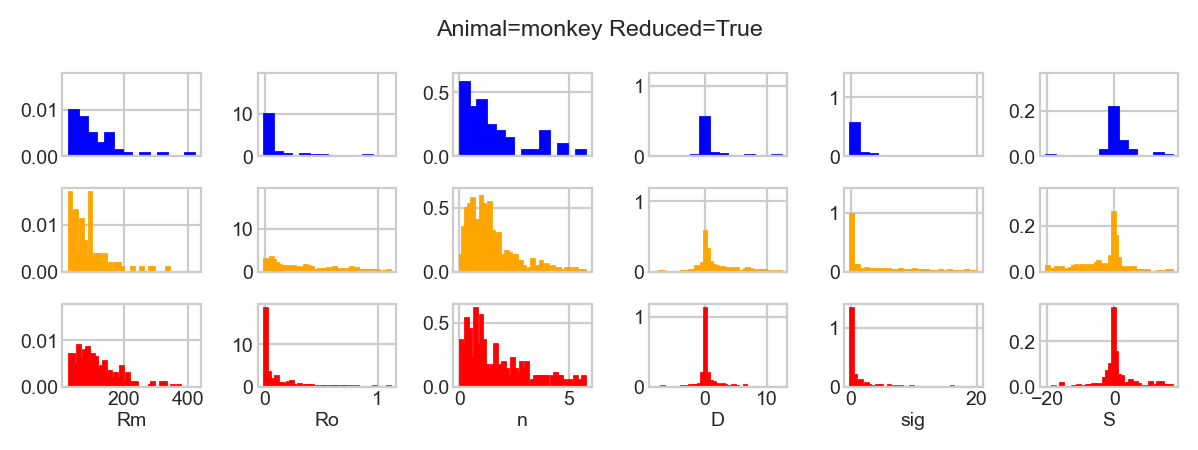

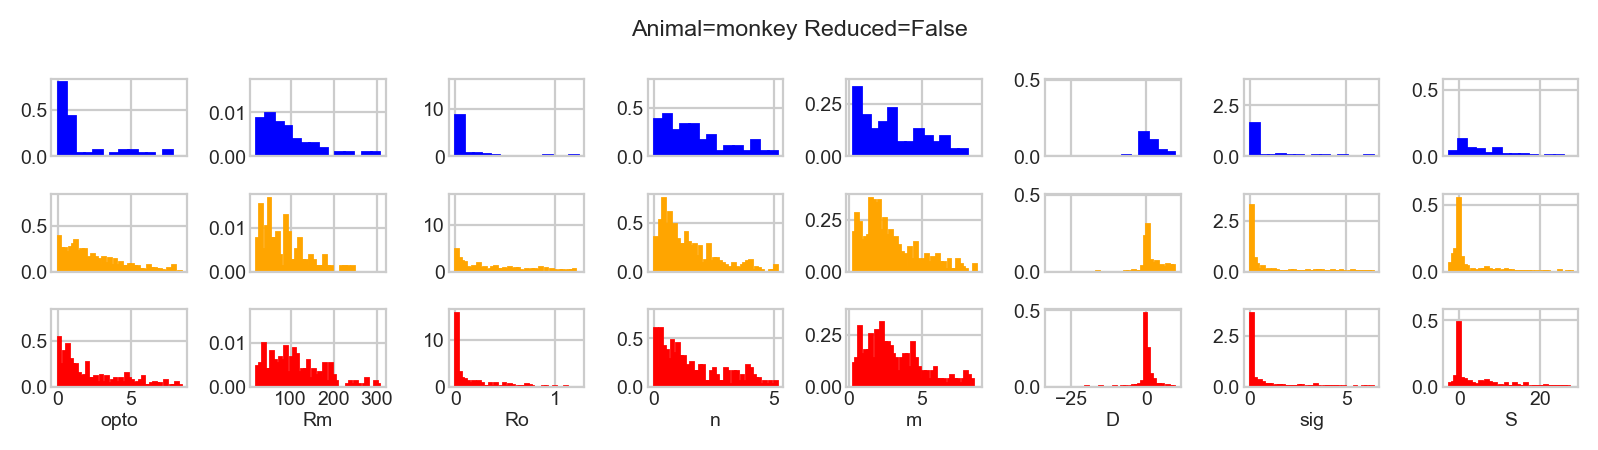

In [15]:
import matplotlib as mpl
# Define plotting style
font = {'family' : 'normal', 'weight' : 'normal', 'size' : 7, 'family' : 'serif', 'serif' : ['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42



pars_names=['opto','Rm','Ro','n','m','D','sig','S']
pars_names_rdx=['Rm','Ro','n','D','sig','S']


for animal, animal_idx in zip(data.this_animals,range(2)):

    for redux in [True, False]:
        if redux:
            pars_names=['Rm','Ro','n','D','sig','S']
        else:
            pars_names=['opto','Rm','Ro','n','m','D','sig','S']

        fig, axs = plt.subplots(3,len(pars_names), figsize=(len(pars_names),2.2), dpi=200, facecolor='w', edgecolor='k',sharex=False, sharey='col')
        fig.subplots_adjust(hspace =0.1, wspace=.05)

        name_out='Animal='+animal+'_Reduced='+str(redux)
        name_file_out='Normalization_Histograms_Comparative_Animal='+animal+'_Reduced='+str(redux)
        pars_nr=len(output_norm_data['all_pars_'+name_out][0])
        
        fig.suptitle('Animal='+animal+' Reduced='+str(redux))
        for k in range(pars_nr):
            lb=np.percentile(output_norm_data['all_pars_'+name_out][:,k],2)
            ub=np.percentile(output_norm_data['all_pars_'+name_out][:,k],95)
            bins=np.linspace(lb,ub,15)

            axs[0,k].hist(output_norm_data['all_pars_'+name_out][:,k],bins,density=True,color='blue',edgecolor='blue')
            axs[0,k].set_xticklabels([])
            axs[0,k].tick_params(axis='both', which='major', pad=-2) 

            bins=np.linspace(lb,ub,45)

            axs[1,k].hist(output_norm_str['all_pars_'+name_out][:,k],bins,density=True,color='orange',edgecolor='orange')
            axs[1,k].set_xticklabels([])
            axs[1,k].tick_params(axis='both', which='major', pad=-2) 

            bins=np.linspace(lb,ub,45)

            axs[2,k].hist(output_norm_unstr['all_pars_'+name_out][:,k],bins,density=True,color='red',edgecolor='red')
            axs[2,k].set_xlabel(pars_names[k], labelpad=1)
            axs[2,k].tick_params(axis='both', which='major', pad=-2) 


        fig.tight_layout() 
        nameout='./../saved_fits/'+name_file_out
        
        fig.savefig(nameout+'.pdf', bbox_inches='tight')






# Cumulatives 

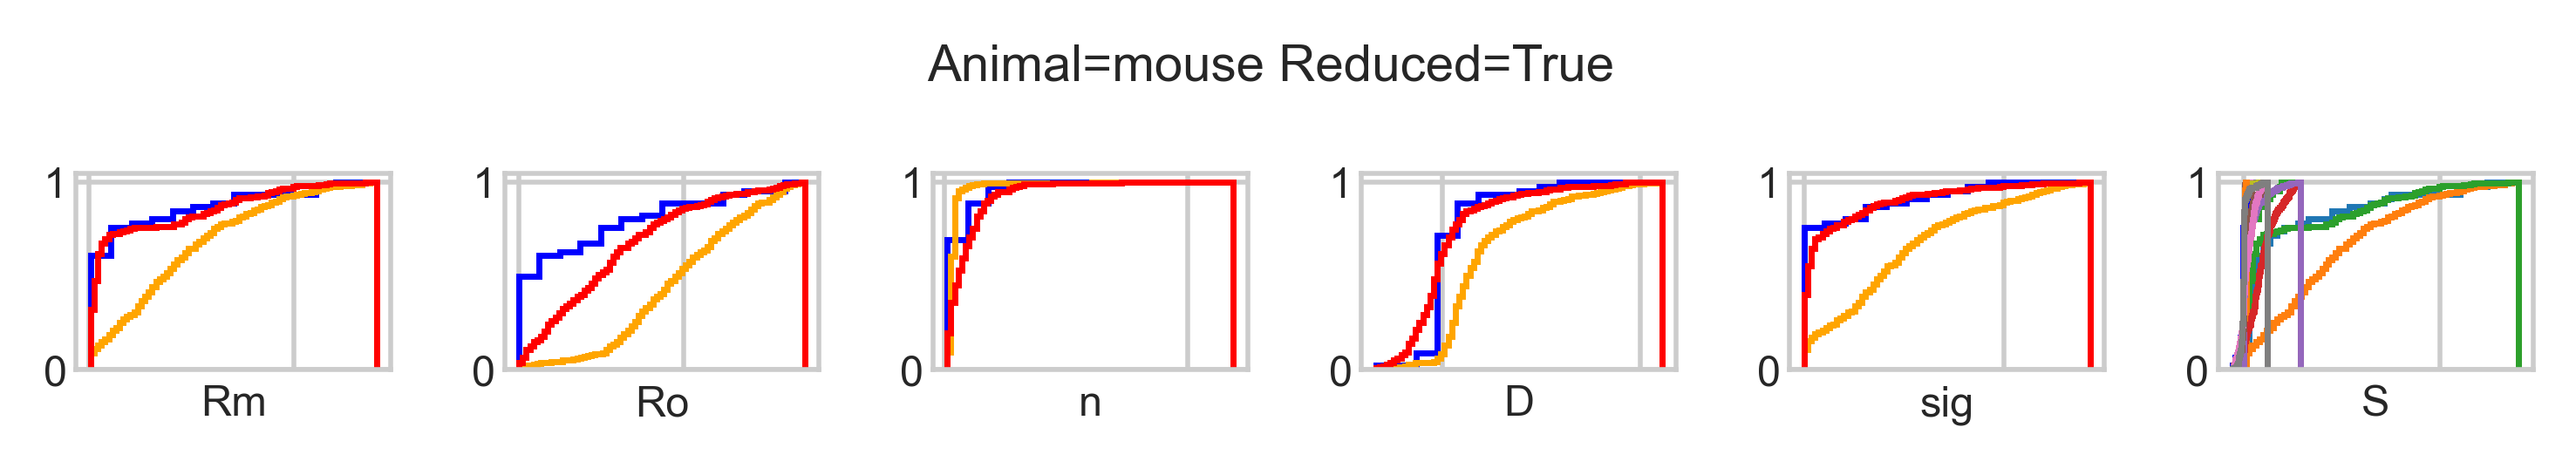

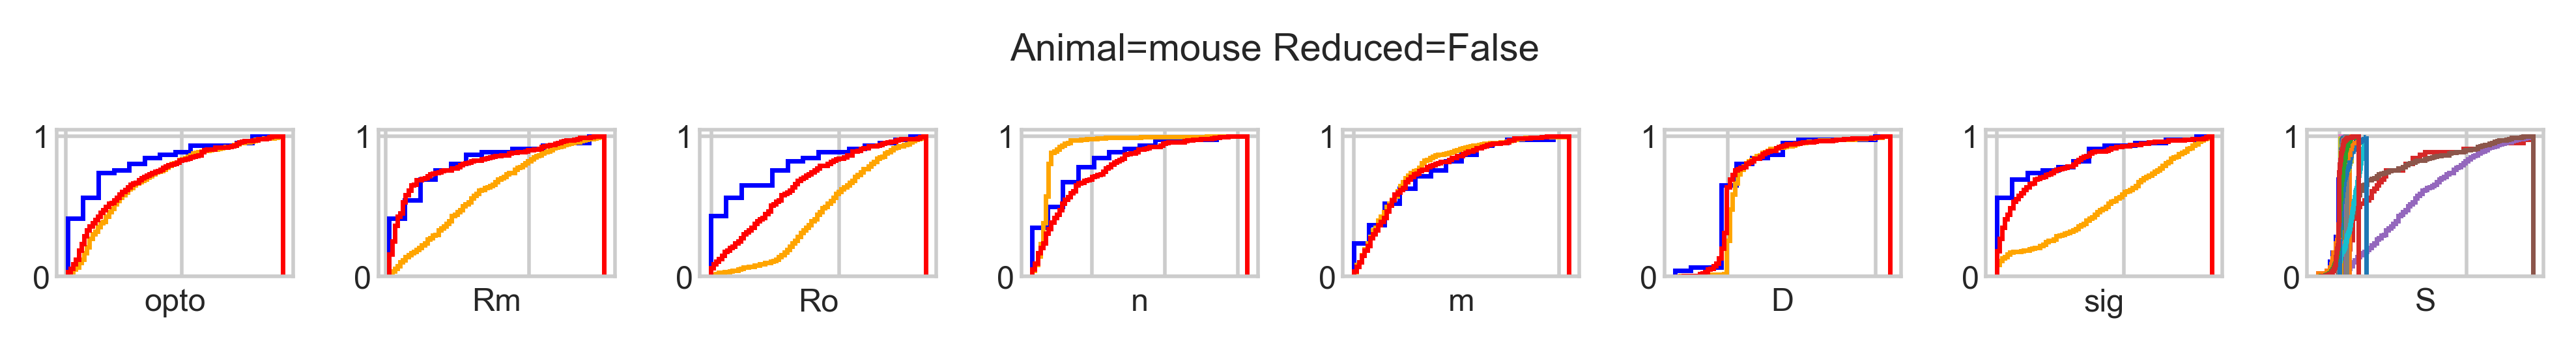

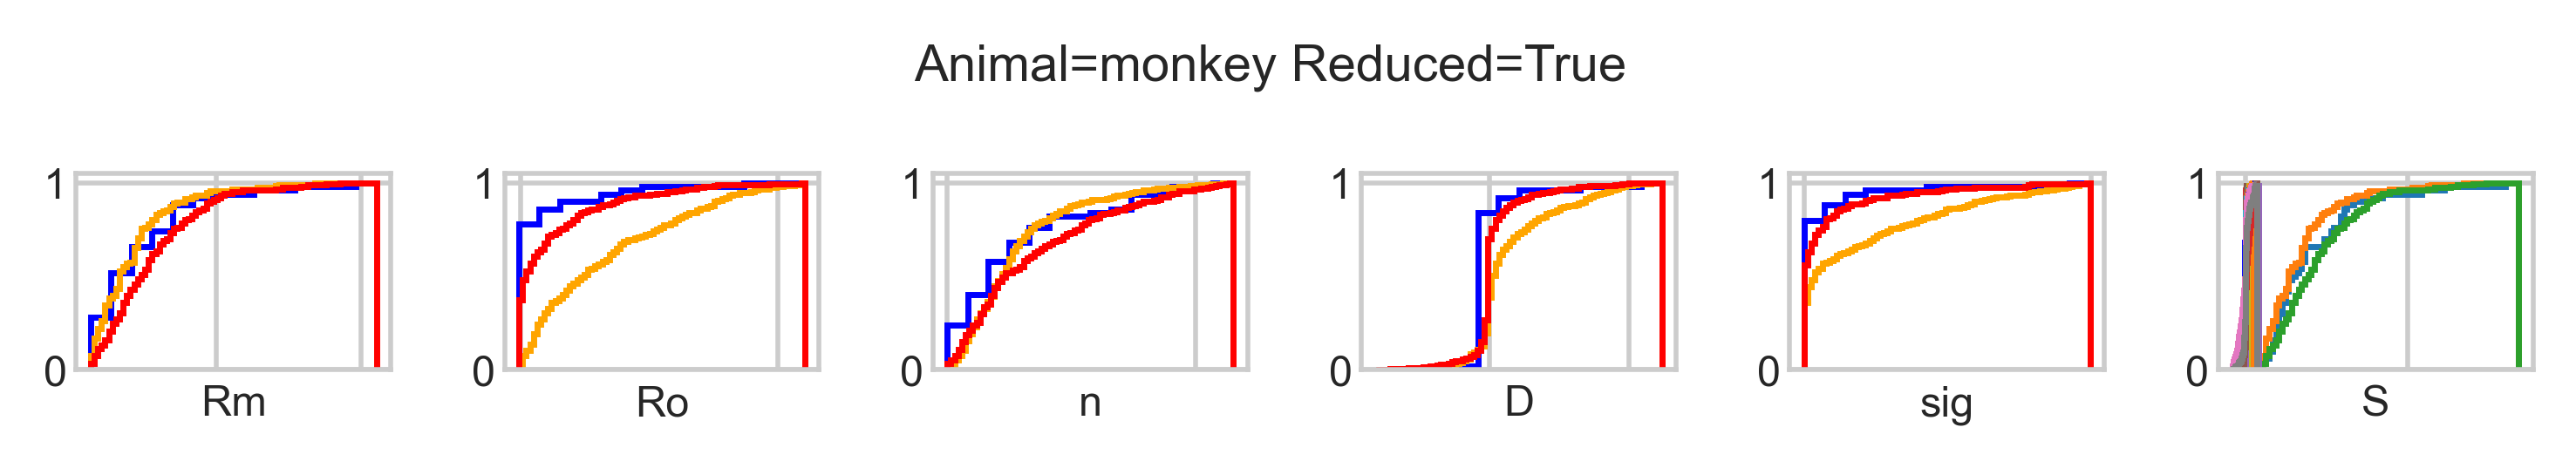

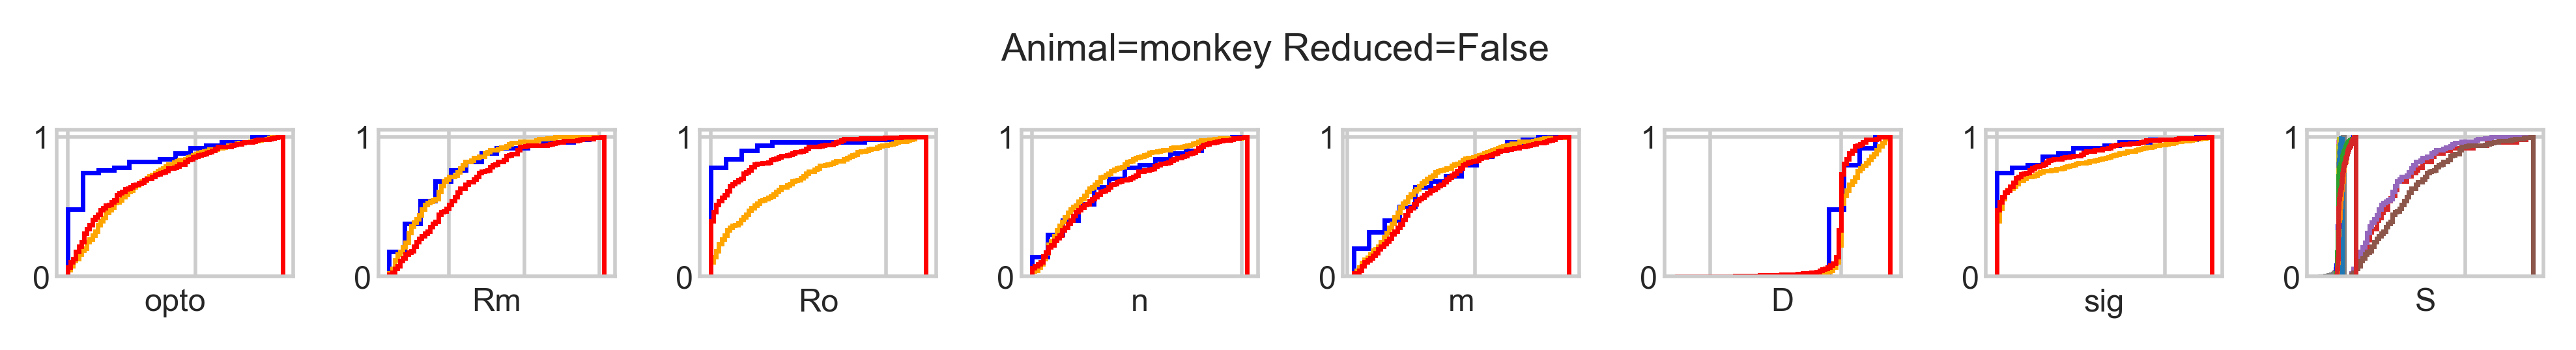

In [35]:
import matplotlib as mpl
# Define plotting style
font = {'family' : 'normal', 'weight' : 'normal', 'size' : 7, 'family' : 'serif', 'serif' : ['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42



pars_names=['opto','Rm','Ro','n','m','D','sig','S']
pars_names_rdx=['Rm','Ro','n','D','sig','S']

error_str={}
error_unstr={}


for animal, animal_idx in zip(data.this_animals,range(2)):

    for redux in [True, False]:
        if redux:
            pars_names=['Rm','Ro','n','D','sig','S']
        else:
            pars_names=['opto','Rm','Ro','n','m','D','sig','S']

        fig, axs = plt.subplots(1,len(pars_names), figsize=(len(pars_names),1), dpi=500, facecolor='w', edgecolor='k',sharex=False, sharey='col')
        fig.subplots_adjust(hspace =0.01, wspace=0.01)

        name_out='Animal='+animal+'_Reduced='+str(redux)
        name_file_out='Normalization_Histograms_Comparative_Animal='+animal+'_Reduced='+str(redux)
        pars_nr=len(output_norm_data['all_pars_'+name_out][0])
        
        fig.suptitle('Animal='+animal+' Reduced='+str(redux))
        

        error_str[name_out]=np.zeros(pars_nr)
        error_unstr[name_out]=np.zeros(pars_nr)

        
        for k in range(pars_nr):
            lb=np.percentile(output_norm_data['all_pars_'+name_out][:,k],2)
            ub=np.percentile(output_norm_data['all_pars_'+name_out][:,k],95)
            bins=np.linspace(lb,ub,15)

            axs[k].hist(output_norm_data['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                           cumulative=True, color='blue',edgecolor='blue')
            axs[k].set_xticklabels([])
            axs[k].tick_params(axis='both', which='major', pad=-2) 

            bins=np.linspace(lb,ub,80)

            axs[k].hist(output_norm_str['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                           cumulative=True, color='orange',edgecolor='orange')
            axs[k].set_xticklabels([])
            axs[k].tick_params(axis='both', which='major', pad=-2) 

            bins=np.linspace(lb,ub,80)

            axs[k].hist(output_norm_unstr['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                           cumulative=True, color='red',edgecolor='red')
            axs[k].set_xlabel(pars_names[k], labelpad=1)
            axs[k].tick_params(axis='both', which='major', pad=-2) 



            Out_hist_data=plt.hist(output_norm_data['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                       cumulative=True)


            Out_hist_str=plt.hist(output_norm_str['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                       cumulative=True)

            Out_hist_unstr=plt.hist(output_norm_unstr['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                       cumulative=True)

            error_str[name_out][k]=np.sum(Out_hist_str[0]-Out_hist_data[0])/np.sum(Out_hist_data[0])
            error_unstr[name_out][k]=np.sum(Out_hist_unstr[0]-Out_hist_data[0])/np.sum(Out_hist_data[0])



        fig.tight_layout() 
        nameout='./../saved_fits/'+name_file_out
        
        fig.savefig(nameout+'.pdf', bbox_inches='tight')




